In [1]:
import numpy as np
import pandas as pd
from scipy import ndimage, misc
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


(512, 512)


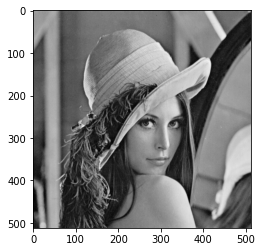

In [2]:
lena = cv.imread("./images/lena.png")
img = cv.cvtColor(lena, cv.COLOR_BGR2GRAY)
print(img.shape)
plt.imshow(img, cmap='gray')

Prewitt


In [3]:
hx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
hy = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
print(hx)
print(hy)

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


Prewitt

(<AxesSubplot:title={'center':'Vertical'}>,
 Text(0.5, 1.0, 'Vertical'))

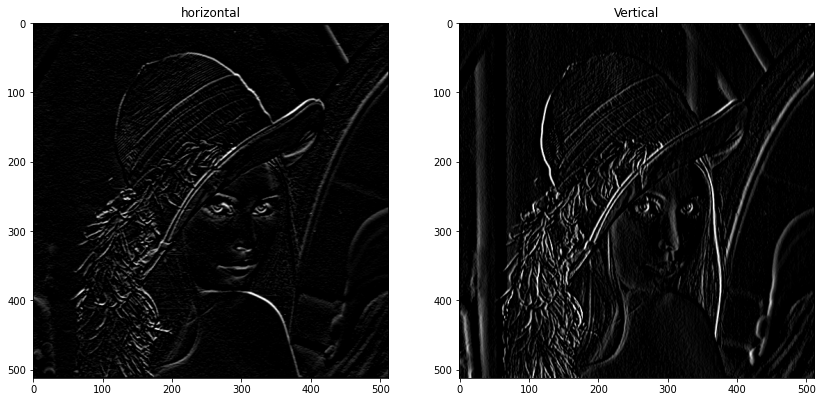

In [4]:
horiz = cv.filter2D(img,-1,hy)
vertic = cv.filter2D(img,-1,hx)
plt.figure(figsize=(14,14))
plt.subplot(121),plt.imshow(horiz,cmap = "gray"),plt.title("horizontal")
plt.subplot(122),plt.imshow(vertic,cmap = "gray"),plt.title("Vertical")

In [5]:
Module = np.sqrt(vertic^2 + horiz^2)
phase = np.arctan(horiz/vertic)
print(f'Module is {Module}')
print(f'Phase is {phase}')

Module is [[0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 ...
 [0.    4.797 3.316 ... 3.162 4.582 5.477]
 [2.646 4.69  7.484 ... 3.873 4.125 4.473]
 [0.    5.746 6.    ... 3.873 3.465 0.   ]]
Phase is [[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan 0.04542328 0.26060239 ... 1.24904577 1.57079633 1.57079633]
 [1.57079633 0.23684876 0.64833199 ... 0.46364761 1.43824479 1.57079633]
 [       nan 0.         0.         ... 0.         0.                nan]]


C:\Users\asus zephyrus\AppData\Local\Temp\ipykernel_6440\2765614601.py:2: RuntimeWarning: divide by zero encountered in true_divide
  phase = np.arctan(horiz/vertic)
C:\Users\asus zephyrus\AppData\Local\Temp\ipykernel_6440\2765614601.py:2: RuntimeWarning: invalid value encountered in true_divide
  phase = np.arctan(horiz/vertic)


(<matplotlib.image.AxesImage at 0x2c9c7a1ce50>,
 Text(0.5, 1.0, 'Squared root Image of Prewitt'))

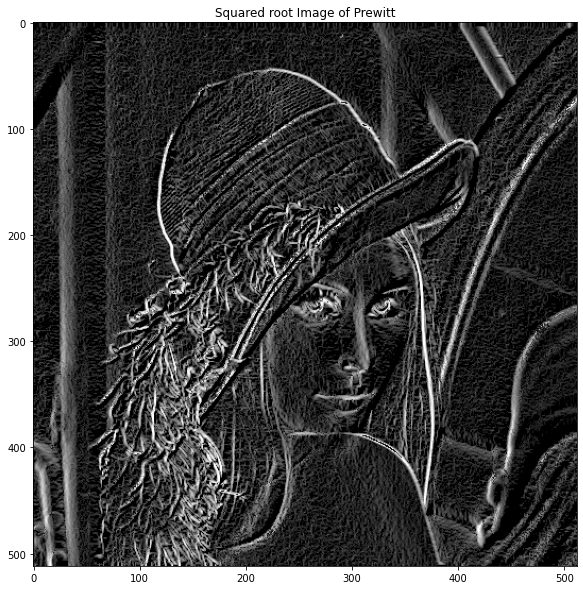

In [6]:
x = np.uint8(Module)
plt.figure(figsize=(10,10))
plt.imshow(x,cmap='gray'),plt.title("Squared root Image of Prewitt")


Filtre Sobel

(<AxesSubplot:title={'center':'vertical'}>,
 Text(0.5, 1.0, 'vertical'))

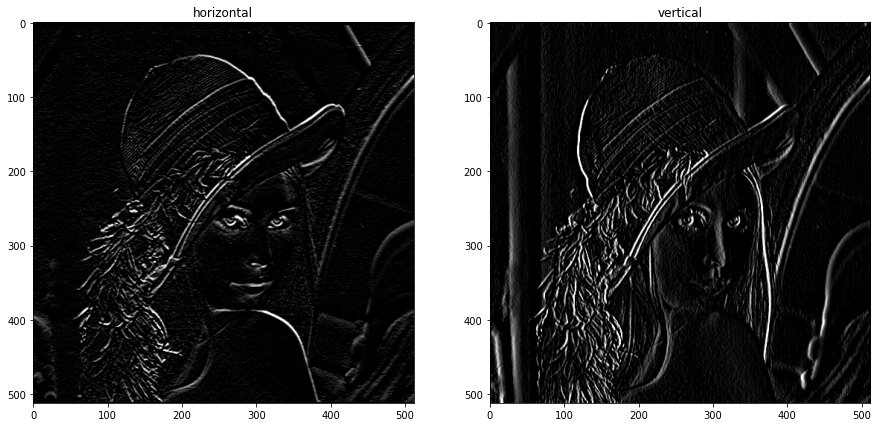

In [7]:
hxx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
hyy = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
horizs = cv.filter2D(img,-1,hyy)
vertics = cv.filter2D(img,-1,hxx)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(horizs,cmap = "gray"),plt.title("horizontal")
plt.subplot(122),plt.imshow(vertics,cmap = "gray"),plt.title("vertical")

In [8]:
Modules = np.sqrt(vertics^2 + horizs^2)
phases = np.arctan(horizs/vertics)
print(f'Module is {Modules}')
print(f'Phase is {phases}')

Module is [[0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 ...
 [0.    5.387 5.098 ... 3.465 5.293 6.48 ]
 [2.    5.656 3.162 ... 3.162 4.242 5.832]
 [0.    6.633 7.617 ... 4.473 4.    0.   ]]
Phase is [[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan 0.         0.44237422 ... 1.30454428 1.57079633 1.57079633]
 [1.57079633 0.19739556 0.64350111 ... 0.32175055 1.27933953 1.57079633]
 [       nan 0.         0.         ... 0.         0.                nan]]


C:\Users\asus zephyrus\AppData\Local\Temp\ipykernel_6440\4073680870.py:2: RuntimeWarning: divide by zero encountered in true_divide
  phases = np.arctan(horizs/vertics)
C:\Users\asus zephyrus\AppData\Local\Temp\ipykernel_6440\4073680870.py:2: RuntimeWarning: invalid value encountered in true_divide
  phases = np.arctan(horizs/vertics)


(<matplotlib.image.AxesImage at 0x2c9c7b44d60>,
 Text(0.5, 1.0, 'Squared root Image of Sobel'))

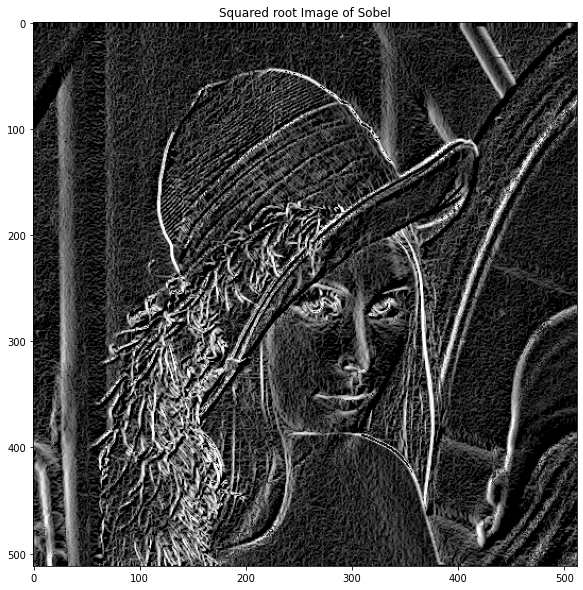

In [9]:
xs = np.uint8(Modules)
plt.figure(figsize=(10,10))
plt.imshow(xs,cmap='gray'),plt.title("Squared root Image of Sobel")


Classic Filter

(<AxesSubplot:title={'center':'vertical'}>,
 Text(0.5, 1.0, 'vertical'))

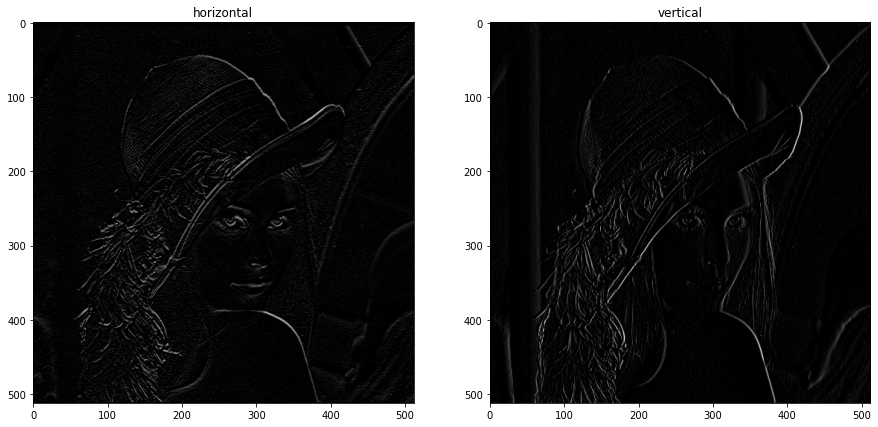

In [10]:
hxg = np.array([[1,-1]])
hyg = -hxg.T
horizss = cv.filter2D(img,-1,hyg)
verticss = cv.filter2D(img,-1,hxg)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(horizss,cmap = "gray"),plt.title("horizontal")
plt.subplot(122),plt.imshow(verticss,cmap = "gray"),plt.title("vertical")

In [11]:
Moduless = np.sqrt(verticss^2 + horizss^2)
phasess = np.arctan(horizss/verticss)
print(f'Module is {Moduless}')
print(f'Phase is {phasess}')

Module is [[0.    0.    0.    ... 1.    3.873 5.195]
 [0.    0.    0.    ... 1.    3.873 5.195]
 [0.    0.    0.    ... 1.    3.873 5.195]
 ...
 [0.    0.    0.    ... 2.45  1.414 2.   ]
 [1.    1.    2.236 ... 0.    2.236 3.742]
 [0.    0.    0.    ... 0.    0.    0.   ]]
Phase is [[       nan        nan        nan ... 0.         0.         0.        ]
 [       nan        nan        nan ... 0.         0.         0.        ]
 [       nan        nan        nan ... 0.         0.         0.        ]
 ...
 [       nan        nan        nan ... 1.57079633 0.46364761 0.78539816]
 [1.57079633 1.57079633 1.57079633 ...        nan 1.57079633 1.57079633]
 [       nan        nan        nan ...        nan        nan        nan]]


C:\Users\asus zephyrus\AppData\Local\Temp\ipykernel_6440\1981929438.py:2: RuntimeWarning: divide by zero encountered in true_divide
  phasess = np.arctan(horizss/verticss)
C:\Users\asus zephyrus\AppData\Local\Temp\ipykernel_6440\1981929438.py:2: RuntimeWarning: invalid value encountered in true_divide
  phasess = np.arctan(horizss/verticss)


(<matplotlib.image.AxesImage at 0x2c9c7c61c60>,
 Text(0.5, 1.0, 'Squared root Image of Classic Methode'))

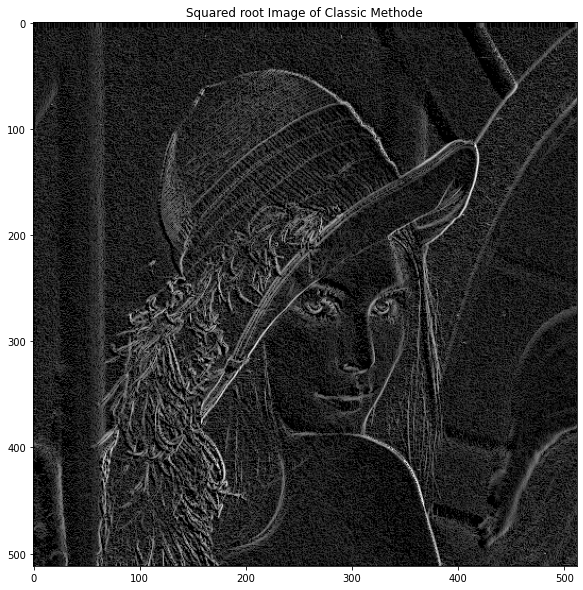

In [12]:
xss = np.uint8(Moduless)
plt.figure(figsize=(10,10))
plt.imshow(xss,cmap='gray'),plt.title("Squared root Image of Classic Methode")

In [13]:
laplacien4 = np.array([[0,1,0],[1,-4,1],[0,1,0]])
laplacien8 = np.array([[1,1,1],[1,-8,1],[1,1,1]])

(<AxesSubplot:title={'center':'Squared root Image of laplacien 8 connexite'}>,
 Text(0.5, 1.0, 'Squared root Image of laplacien 8 connexite'))

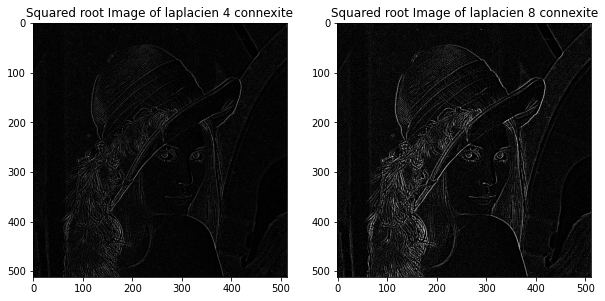

In [14]:
lap = cv.filter2D(img,-1,laplacien4)
xsss = np.uint8(lap)
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(xsss,cmap='gray'),plt.title("Squared root Image of laplacien 4 connexite")
lapp = cv.filter2D(img,-1,laplacien8)
xssss = np.uint8(lapp)
plt.subplot(122),plt.imshow(xssss,cmap='gray'),plt.title("Squared root Image of laplacien 8 connexite")

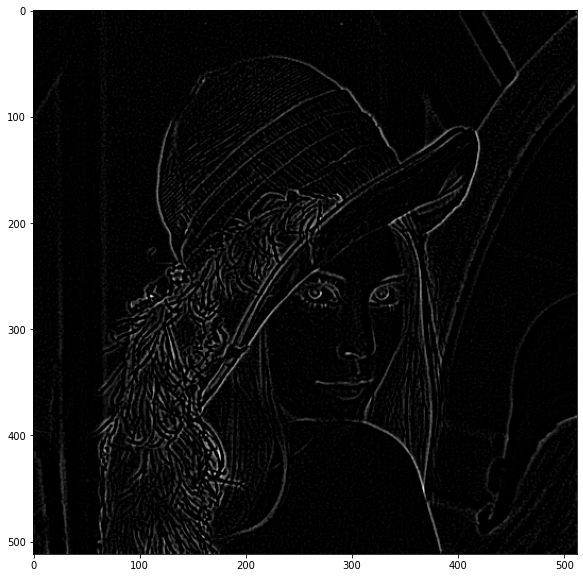

In [15]:
gauss = cv.GaussianBlur(img,(3,3),1)
gauss8 = cv.filter2D(gauss,-1,laplacien8)
xsx = np.uint8(gauss8)
plt.figure(figsize=(10,10))
plt.imshow(xsx,cmap='gray')